In [47]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from mpl_toolkits.basemap import Basemap
#import geopandas as gpd
import seaborn as sns

# Prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

# Classifiers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier


# Data prepping
from sklearn.preprocessing import LabelEncoder


# I- Preprocessing 

### 1- describing datasets 

In [48]:
df_w=pd.read_csv(r'C:\Users\33622\Documents\GitHub\data-labs\module-3//terrorist_weather_jan2012_dec_2016.csv', encoding='ISO-8859-1')


In [49]:
df_w.columns

Index(['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'extended',
       'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'claimed', 'property', 'ishostkid', 'nkill',
       'nwound', 'country_txt', 'region_txt', 'attacktype1_txt',
       'targtype1_txt', 'natlty1_txt', 'weaptype1_txt', 'target1', 'gname',
       'summary', 't2m', 'tcc', 'vidgf', 'sp', 'v10'],
      dtype='object')

    Each row in the terrorist dataset contains a date (iyear, imonth, iday) and coordinates (lat, long). These variables were     used to index the 3-dimensional weather data, and the resulting values were appended to the corresponding row in the terrorist dataset. In the end, for a given terrorist attack, the weather at that approximate place could be retrieved. Do note that the time at which an attack was executed, is not recorded in the database. The actual weather at that time might therefore deviate from the recorded weather (at 12:00 PM). Also, as mentioned earlier, the weather location is an approximation of the precise attack location, as the weather coordinates follow steps of 0.75, whereas the terrorist locations are more precise.


- vidgf=Vertical integral of divergence of geopotential
-  v10= 10 metre V wind component

In [50]:
df_w.shape

(65696, 33)

In [51]:
#renaming columns related to weather
df_w.rename(columns={'tcc':'Total_cloud_cover'}, inplace=True)
df_w.rename(columns={'sp':'Surface_pressure'}, inplace=True)
df_w.rename(columns={'t2m':'2meter_Temp'}, inplace=True)


In [52]:
df=pd.read_csv(r'C:\Users\33622\Documents\GitHub\data-labs\module-3//globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head(5)

C:\Users\33622\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [28]:
df.describe() 

,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,...,claimed,property,ishostkid,nkill,nwound,region,gname,summary,num_victims,victims
count,138879.000000,138879.000000,138879.000000,136000.000000,136000.000000,0.0,0.0,138879.0,138879.0,138879.0,...,0.0,138879.000000,138718.000000,138879.000000,138879.000000,138879.000000,0.0,0.0,138879.000000,138879.000000
mean,2003.965668,6.461474,15.519323,23.871581,30.661553,NaN,NaN,1.0,1.0,1.0,...,NaN,0.508803,0.078591,2.144478,3.270055,7.239849,NaN,NaN,5.414534,0.582413
std,12.869845,3.395808,8.807931,18.290251,55.955341,NaN,NaN,0.0,0.0,0.0,...,NaN,0.499924,0.269100,10.673049,39.036193,2.852712,NaN,NaN,45.562376,0.493163
min,1970.000000,0.000000,0.000000,-53.154613,-157.858333,NaN,NaN,1.0,1.0,1.0,...,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.737554,NaN,NaN,1.0,1.0,1.0,...,NaN,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,31.636400,44.004623,NaN,NaN,1.0,1.0,1.0,...,NaN,1.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.597704,69.147011,NaN,NaN,1.0,1.0,1.0,...,NaN,1.000000,0.000000,1.000000,2.000000,10.000000,NaN,NaN,4.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,179.366667,NaN,NaN,1.0,1.0,1.0,...,NaN,1.000000,1.000000,1384.000000,8191.000000,12.000000,NaN,NaN,9574.000000,1.000000


In [54]:
df.shape

(181691, 135)

In [55]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB



 ##### Binary Variables (1 -> yes or 0 -> no)
    
    'crit1', 'crit2', 'crit3', # The incident meets the criterion (1, 2, 3), described in the introduction.
    'doubtterr', # Is there doubt to wether the attack is an act of terrorism?
    'multiple', # Is this incident connected to other incident(s)? !! Consistently available since 1997 !!
    'success', # Has the attack reached its goal? Depends on type of attack.
    'suicide', # Did the perpetrator intend to escape alive?
    'property', # Is there evidence of property damage from the incident?
    'ishostkid', # Were there victims taken hostage or kidnapped?
    
#### Categorical variables
                'country_txt', # Name of country.
                'region', # Region id.
                'region_txt', # Name of region.
                'attacktype1_txt', # Of what type was the attack? I.e. assassination, bombing or kidnapping.
                'targtype1_txt', # What target did the attack have? I.e. business, government or police.
                'natlty1_txt', # Nationality of the target.
                'weaptype1_txt', # What weapon was used?
    
#### Descriptive Variables 
    'target1', # Description of specific target, if applicable.
               
           


# 2.Cleaning the data
#### resolving Missing data and data that is deviant from its guidelines (such as binary data containing '2')problem,
#### dropping  useless columns


In [58]:
#dropping useless columns
df.drop(['addnotes','scite1','scite2','scite3','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','related','approxdate',
        'resolution','nreleased','hostkidoutcome_txt','ransomnote','ransompaidus','ransompaid','ransomamtus',
         'divert','nhostkid','propvalue','propcomment'], axis=1, inplace=True)


In [59]:
df.shape

(181691, 113)

In [60]:
df = df.loc[:, df_columns] # Only keep described columns.

# Random acts of violence and other outliers should not be part of the data.
# Thus, restrict the set the only attacks where the terrorism motive is certain.
df = df[(df.crit1 == 1) & (df.crit2 == 1) & (df.crit3 == 1) & (df.doubtterr == 0)]

# Weapontype column contains very long name for vehicle property -> shorten.
df.weaptype1_txt.replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle', inplace = True)

# Replace -9 (unknown) values with 0 (no). -9 values are much more likely to be false than true.
df.iloc[:,[6, 15, 16, 17]] = df.iloc[:,[6, 15, 16, 17]].replace(-9,0)

# Some values in the claimed category are 2 (should be 0 or 1).
# Assume these were input mistakes and set 2 to 1.
df.claimed.replace(2,1, inplace = True)


In [61]:
# Ensure consistent values and make everything lowercase.
df.target1 = df.target1.str.lower()  
df.target1 = df.target1.fillna('unknown').replace('unk','unknown')


In [70]:
# Replace Nans in nkill and nwound columns with median.
df.nkill = np.round(df.nkill.fillna(df.nkill.median())).astype(int) 
df.nwound = np.round(df.nwound.fillna(df.nwound.median())).astype(int)



In [68]:
#renaming some columns
df.rename(columns={'attacktype1_txt':'attacktype'}, inplace=True)
df.rename(columns={'attacktype1_txt':'attacktype'}, inplace=True)
df.rename(columns={'targtype1_txt':'target_type'}, inplace=True)
df.rename(columns={'natlty1_txt':'nationality'}, inplace=True)
df.rename(columns={'weaptype1_txt':'weaptype'}, inplace=True)
df.rename(columns={'target1':'target'}, inplace=True)



In [26]:
df.columns

Index(['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'extended',
       'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'claimed', 'property', 'ishostkid', 'nkill',
       'nwound', 'country_txt', 'region', 'region_txt', 'attacktype',
       'target_type', 'nationality', 'weaptype', 'target', 'gname', 'summary',
       'num_victims', 'victims'],
      dtype='object')

### dropping duplicates 

In [27]:
df[df.index.duplicated()]
df = df.loc[:,~df.columns.duplicated()]
df = df[~df.index.duplicated()]


The main characteristics of the dataset are researched in the exploratory dataanalysis. These characteristics, for instance trends, potential causality or correlation found, will be used to predict future events.

In [57]:
df_columns = ['iyear', 'imonth', 'iday', 'latitude', 'longitude','extended', 'vicinity',  'crit1', 'crit2', 'crit3',
                'doubtterr','multiple','success', 'suicide','claimed','property', 'ishostkid','nkill','nwound','country_txt', 
                'region','region_txt','attacktype1_txt','targtype1_txt','natlty1_txt','weaptype1_txt','target1','gname','summary']          

## 3. Data exploration
### 3.1.Visual exploration


### 3.1.1. Where ddid the terrorist attacks happen?

In [29]:
orange_palette = ((3, 0, '#FBBC00', '1 - 20'), (4, 20, '#FDA600', '21 - 50'), (5, 50, '#EE8904', '51 - 100'), \
                  (7, 100, '#ED9001', '101 - 250'), (9, 250, '#ED6210', '251 - 600'), \
                  (11, 600, '#DE6D0A', '601 - 1000'), (13, 1000, '#D8510F', '1001 - 2000'), \
                  (15, 2000, '#D23711', '2001 - 4000'), (18, 4000, '#F61119', '4001 - 7500'), \
                  (30, 7500, '#9C200A', '7501 - ∞')) #marker size, count size, color

plt.figure(figsize=(15,15))
# Rounds the long- and latitude to a number withouth decimals, groups them on long- and latitude and counts the amount of attacks.
df_coords = df.round({'longitude':0, 'latitude':0}).groupby(["longitude", "latitude"]).size().to_frame(name = 'count').reset_index()
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.shadedrelief()
    
def plot_points(marker_size, count_size, colour, label_count):
    x, y = m(list(df_coords.longitude[df_coords['count'] >= count_size].astype("float")),\
                (list(df_coords.latitude[df_coords['count'] >= count_size].astype("float"))))
    points = m.plot(x, y, "o", markersize = marker_size, color = colour, label = label_count, alpha = .5)

for p in orange_palette:
    plot_points(p[0], p[1], p[2], p[3]) 
    
plt.title("Amount of terrorist attacks per rounded coordinates", fontsize=24)
plt.legend(title= 'Colour per counted attack', loc ='lower left', prop= {'size':11})
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 1080x1080 with 0 Axes>

C:\Users\33622\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Text(0.5, 1, 'Amount of terrorist attacks per rounded coordinates')

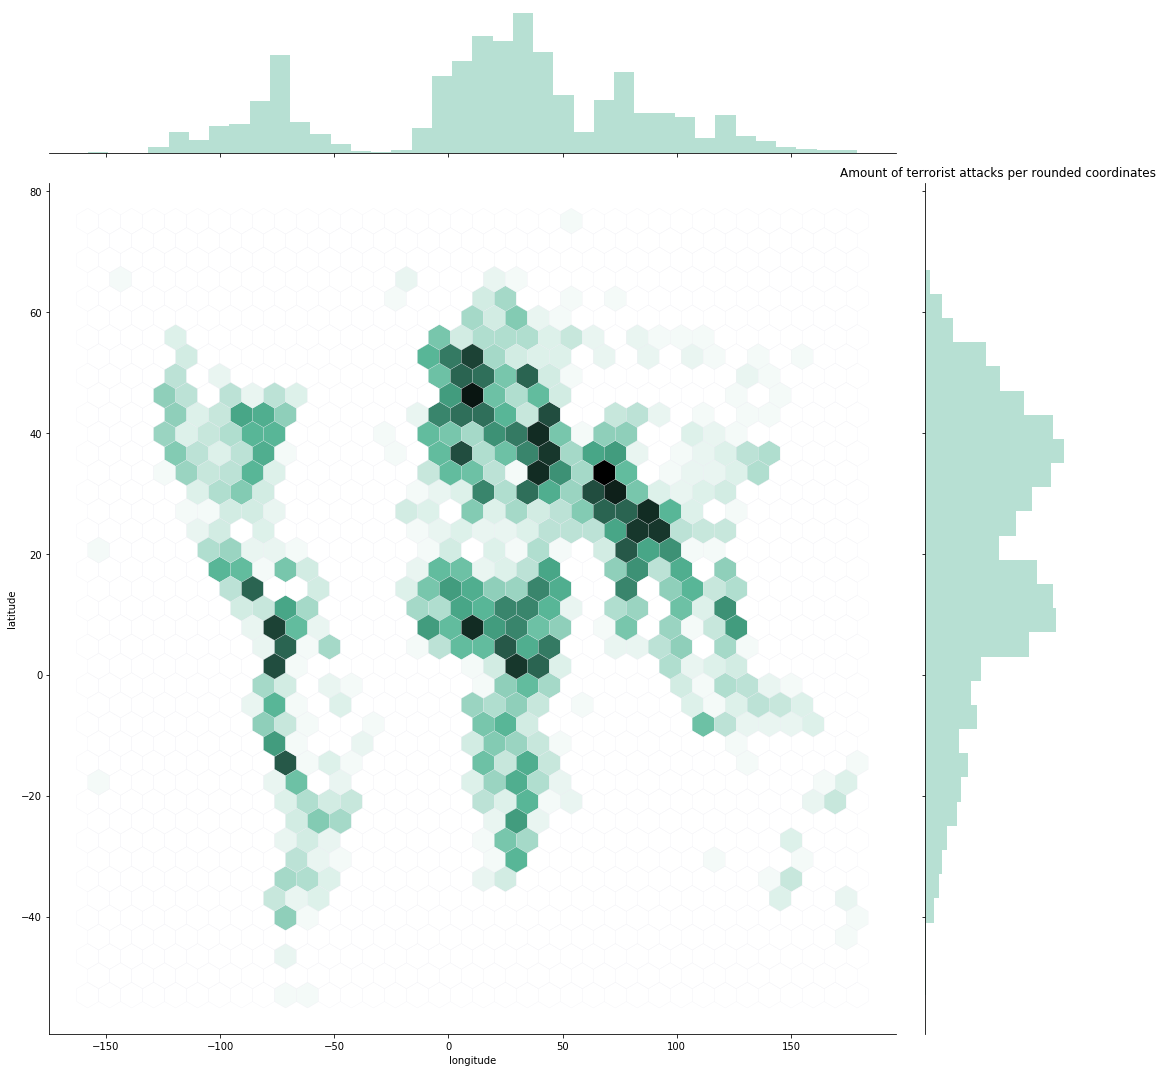

In [30]:
df_coords = df.round({'longitude':0, 'latitude':0}).groupby(["longitude", "latitude"]).size().to_frame(name = 'count').reset_index()
sns.jointplot(x='longitude', y='latitude', data=df_coords, kind="hex", color="#4CB391", size=15, stat_func=None, edgecolor="#EAEAF2", linewidth=.2)
plt.title('Amount of terrorist attacks per rounded coordinates')

##### images above show where attacks are mostly focused. 
#### worldmap  
shows which countries are most troubled by terrorism. From the map the conclusion can be drawn that the Middle
East is most troubled by terrorism. The countries in the Middle East that are often affected by terrorism are Iraq,
Iran and Syria. Some other countries that heavily suffered over the years from terrorism are India, Pakistan and Ireland.

#### hexplot 
shows for which range longitude and latitude the attacks are most common. 
For longitude it is mainly between 5 and 40 and for latitude it is around 35 and 12.

### 3.1.2. What is the rate of success of attacks per region?


AttributeError: 'DataFrame' object has no attribute 'eventid'

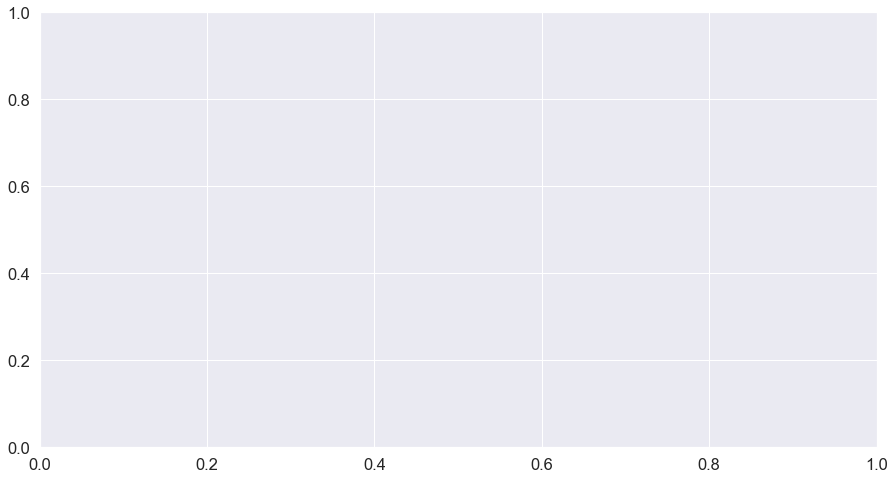

In [62]:
region_dictionary = {1: 'North America', 2: 'Central America & Carribean', 3: 'South America',
                     4: 'East Asia', 5: 'Southeast Asia', 6: 'South Asia', 7: 'Central Asia',
                     8: 'Western Europe', 9: 'Eastern Europe', 10: 'Middle East and North Africa',
                     11: 'Sub-Saharan Africa', 12: 'Australasia and Oceania'}

def multi_graph(result,result_list, xmin, xmax, ymin, ymax):
    fig2, ax2 = plt.subplots(figsize = (15,8))
    number = 1 #the for-loop in append_list processes the regions in order from 1 to 12
    for j in result_list:
        ax2.plot(j.index, j.eventid, label = '%s ' % region_dictionary[number] )
        number += 1

    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('year')
    plt.ylabel('number of attacks')
    plt.title(result)
    ax2.legend(loc = 'center', frameon = True, edgecolor = 'black',bbox_to_anchor =(1.2,0.4))


success_list = []
failure_list = []

for i in region_dictionary:
    region_data = df[(df.region == i)]
    region_data_success = region_data[(region_data.success == 1)]
    region_data_failure = region_data[(region_data.success == 0)]
    region_grouped_success = region_data_success.groupby('iyear').count()
    region_grouped_failure = region_data_failure.groupby('iyear').count()

    
    success_list.append(region_grouped_success)
    failure_list.append(region_grouped_failure)

multi_graph('Successes',success_list, 1970, 2011, 0, 2100)
multi_graph('Successes',success_list, 2012, 2016, 0, 6500)
multi_graph('Failures',failure_list, 1970, 2011, 0, 200)
multi_graph('Failures',failure_list, 2012, 2016, 0, 1300)

#### Immediately noticable is the drop in both successfull and failed attacks in 1998. This is a phenomon shared by all regions
and should be investigated more closely. During the last 5 years (2011-2016) there is no clear increase in attacks 
except for North America and in some extend also South-Asia. The strong increase of failed attacks in North America 
could be due to sharpened measures taken after 9/11 2001. At the same time the number of successful attacks increased 
as well and started declining since 2014 for both North America and South Asia.

AttributeError: 'DataFrame' object has no attribute 'eventid'

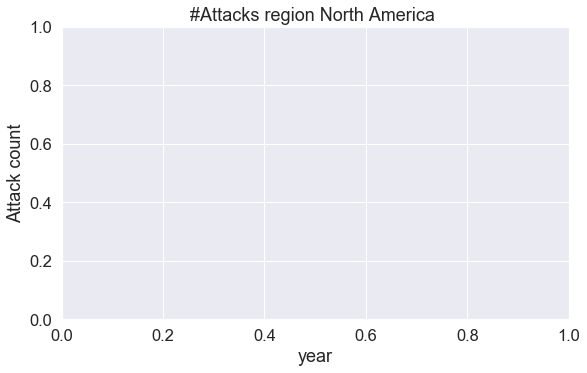

In [64]:
def generate_graph(by_region_list):
    fig = plt.figure(figsize=(20,70))
    i = 1
    
    for element in by_region_list:
        ax1 = fig.add_subplot(11,2,i)
        ax1.set(title = '#Attacks region %s ' % region_dictionary[element[2]],
                ylabel = 'Attack count', xlabel = 'year')

        #entering data
        ax1.plot(element[0].index, element[0].eventid, label = 'Successfull attacks' )
        ax1.plot(element[1].index, element[1].eventid, label = 'Failed attacks' )
        
        i+=1
    
    #add legend
    ax1.legend(loc = 'upper center', frameon = True, edgecolor = 'black', bbox_to_anchor =(-0.1,-0.4))
    plt.show()  


def by_region():
        for region_number in region_dictionary:
            region_data = df[(df.region == region_number)] #for each region group data by year
            region_grouped_success = region_data[(region_data.success == 1)].groupby('iyear').count() #filter on success and group by year
            region_grouped_failure = region_data[(region_data.success == 0)].groupby('iyear').count() #filter on failure and group by year
            
            by_region_list.append([region_grouped_success, region_grouped_failure, region_number])
        
        #create line plot for region grouped by year
        generate_graph(by_region_list)

by_region_list = []
by_region()

####### The graphs show no clear trend through time, they show erratic lines. There are some regions, e.g. regions in Asia and Africa,
that display a strong increase of terrorist attacks starting around 2005. The question is whether this is a consequence of 
better documentation and communication or that the number of attacks have actually increased.

In [ ]:
df.columns

### 3.1.3.Which attack types are popular?

Text(0, 0.5, 'Attack type')

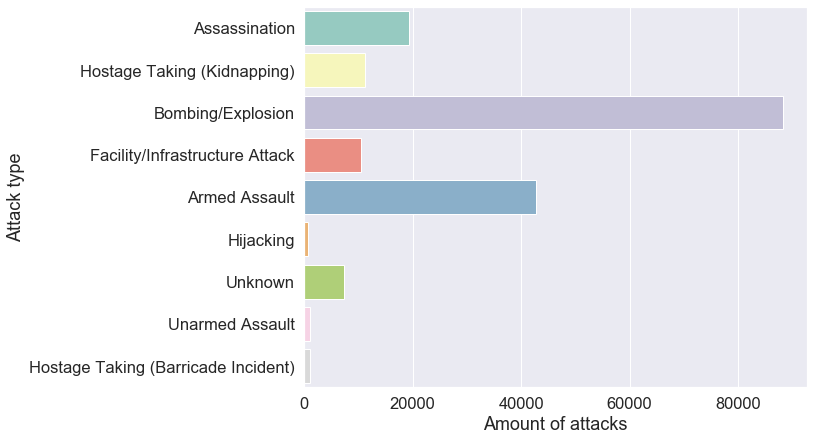

In [14]:
plt.figure(figsize=(9,7))
ax = sns.countplot(y="attacktype", data=df, palette="Set3")
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Attack type")

### 3.1.4. Favorite targets 

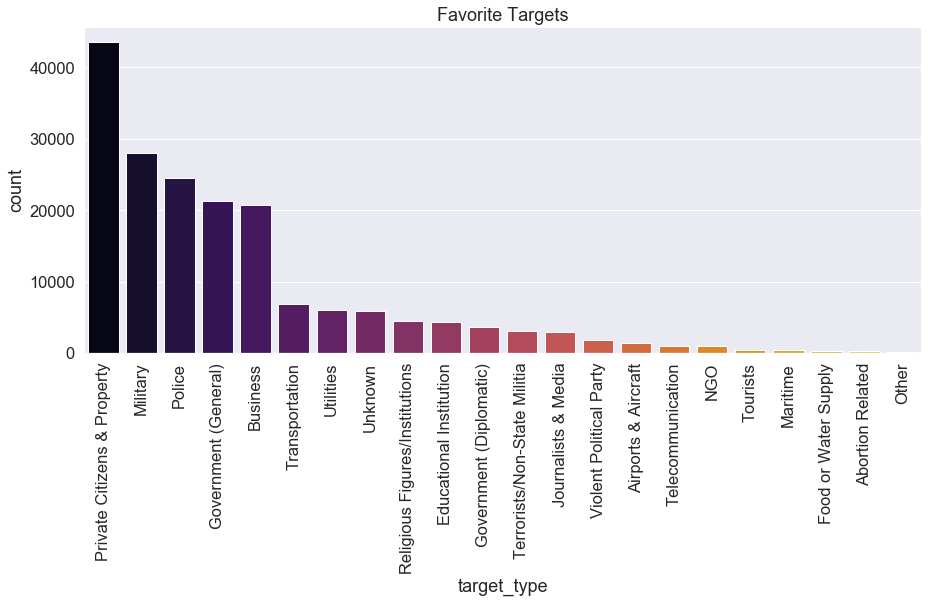

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(df['target_type'],palette='inferno',order=df['target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

### 3.1.5.Has the amount of attacks increased during recent years?

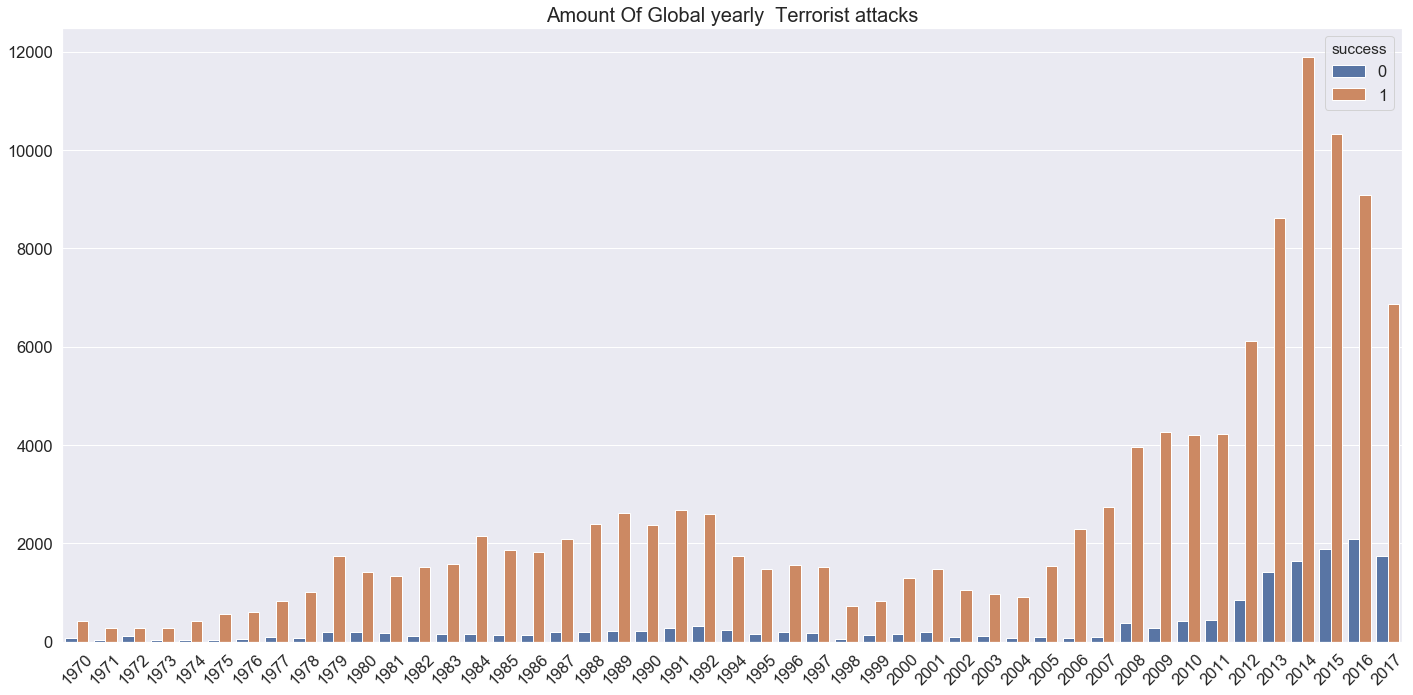

In [105]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=df,hue='success', orient='v');
plt.xlabel('')
plt.ylabel('')
plt.title('Amount Of Global yearly  Terrorist attacks', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='afmhot_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Amount Of Global Terrorist attacks Each Year')
plt.show()


##### By looking at the graph, one might come to the shocking conclusion that the amount of terrorist attacks has been drastically
increasing during the last five years. However, it is important to take into account the effictiveness of data collection since 
2012.
To quote Michael Jensen, START, November 25, 2013: "While there is no simple answer to this question, what is certain is 
that by the start of the 2012 collection effort, the staff working on the GTD had become better than ever at identifying 
terrorist attacks, regardless of where they happened to occur."
This implies that the uncertainty in data collection may or may not be responsible for the increase in attacks. 
The same article puts this statement into perspective: “With that said, the GTD team believes that some portion 
    of the observable increase in terrorist activity since 2011 is the result of new advancements in collection 
    methodology.” Concluding, results from data analysis should be considered with care.

## 3.2. Features analysis 

#### Target selection 

    Since we are trying to predict whether or not there will victims during a terrorist attack. I define my target as the    binary counterpart to our casualties feature

 - Casualties : 1

 - No Casualties : 0

In [71]:
#combine'nkil'l and 'nwound' columns into 'num_victims' column.
# Also add has_casualties column.
df['num_victims'] = df['nkill'] + df['nwound']
df['victims'] = df['num_victims'].apply(lambda x: 0 if x == 0 else 1)

### Features Selection 

In [117]:
feature_cols = [
    'iyear', 'imonth', 'iday', 'latitude', 'longitude',
    
                'extended',
                'vicinity',
                'doubtterr',
                'multiple',
                'success',
                'suicide',
                'claimed',
                'property',
                'ishostkid',
    
                'country_txt',
                'region',
                'attacktype',
                'target_type',
                'weaptype',
]

# Prediction
#### predicting casualties from GTD-exclusive features?
- Now, columns that are exclusively part of the Global Terrorism Database will be tested for their significance on predicting casualties.

In my Model for predicting  presence or absence of victims  the interpretation is as follows:
  TN =model predicts correctly victims absence

  TP = model predicts correctly  victims presence

 FN = model predicts present victims wrongfully to be absents

 FP = model predicts absent victims wrongfully to be presents 


- The Precision(=accuracy of the positive predictions), Recall(=ratio of positive instances correctly detected by the classifier) and f1-score may be more concise metrics, however.

- Precision for 'success' = TP/(TP+FP)
- Precision for not 'success' = TN/(TN+FN)

- Recall for 'success' = TP/(TP+FN)
- Recall for not 'success' = TN/(TN+FP)

- f1-score is the harmonic mean of Precision and Recall.

#### train and split 

In [118]:


# Target is a binary value: were there any casualties in the attack?
target_col = 'victims'

lb = LabelEncoder()
df['country_txt'] = lb.fit_transform(df['country_txt'])
df['attacktype'] = lb.fit_transform(df['attacktype'])
df['target_type'] = lb.fit_transform(df['target_type'])
df['weaptype'] = lb.fit_transform(df['weaptype'])

# Define X and Y.
X = df[feature_cols].fillna(0)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree 
### Decision Tree - with max node depth of 3

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
y = df['victims'] #this is what am trying to predict!
X = df[feature_cols]
dtc = DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)


In [121]:
dtc_pred = dtc.predict(X_test)
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65     17405
           1       0.74      0.88      0.80     24259

    accuracy                           0.75     41664
   macro avg       0.75      0.72      0.73     41664
weighted avg       0.75      0.75      0.74     41664



In [122]:
print(confusion_matrix(y_test,dtc_pred))

[[ 9857  7548]
 [ 2986 21273]]


Normalized confusion matrix
[[0.57 0.43]
 [0.12 0.88]]
Confusion matrix, without normalization
[[ 9857  7548]
 [ 2986 21273]]


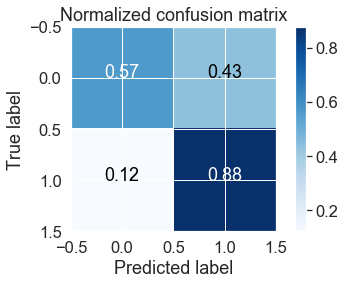

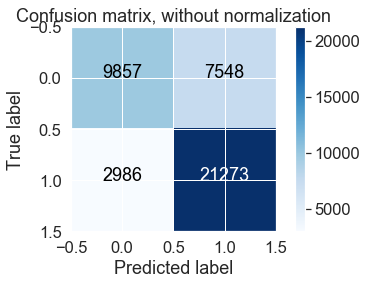

In [125]:
cnf_matrixx = confusion_matrix(y_test,dtc_pred)
 

def plot_confusion_matrixx(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrixx, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrixx,
                      title='Confusion matrix, without normalization')
 
plt.show()

###  testing Feature importances with forests of trees

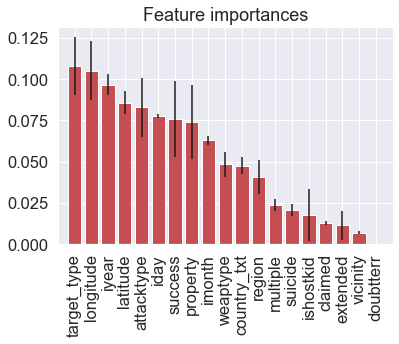

In [74]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

######  This plot shows the significance of each feature on predicting wether there will be casualties or not. Spatio temporal variables seem to be very dominantly present. To avoid overfitting the model, only features with an accuracy score of 0.06 and higher are kept. Two variables have been excluded for another reason: the time variable 'iyear' is exluded as it is a nonrecurring event where day and month are and the variable 'success' is deduced from other features of an attack, for example an 'Assassination' is successful only if the target is killed.. The included features are:

- Target type
- Longitude
- Latitude
- Attack type
- Day
- Month
- Property (damage)

### random forest 

In [155]:
feature_cols = ['longitude', 'target_type', 'latitude', 'attacktype', 'property', 'iday', 'imonth']

X = df[feature_cols].fillna(0) # Assign chosen features to X.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [156]:
model = RandomForestClassifier(n_estimators=20)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

0.8138440860215054

In [157]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [158]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     17427
           1       0.84      0.86      0.85     24237

    accuracy                           0.82     41664
   macro avg       0.82      0.81      0.81     41664
weighted avg       0.82      0.82      0.82     41664



### using confusion matrix on random forest to evaluate the accuracy  

Normalized confusion matrix
[[0.77 0.23]
 [0.16 0.84]]
Confusion matrix, without normalization
[[13399  3931]
 [ 3795 20539]]


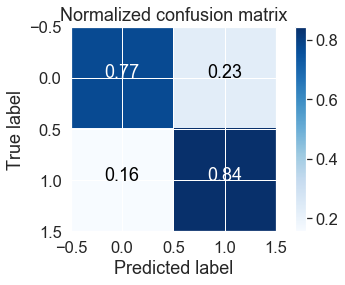

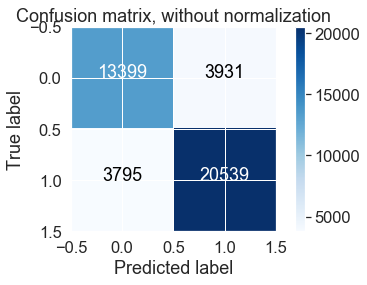

In [129]:
cnf_matrix = confusion_matrix(y_test, y_pred)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
 
plt.show()

- From the evaluation with the confusion matrix i can say that the accuracy is 0.81, a precision of 0.781 and recall of 0.784 
   Overall, comparing the Confusion Matrix of the latter Decision Tree with the Random Forest, the difference is not very striking, except for the clear reduction in False Negatives. The Classification Report does show a clearer improvement, though. 



### cross_validation 

In [146]:
# Better validation with K-fold.
model = RandomForestClassifier(n_estimators=400)

scores = cross_val_score(model, X, y, cv=10) # Ten-fold cross validation.
print(scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[0.74 0.77 0.72 0.77 0.77 0.74 0.76 0.74 0.77 0.77]
Accuracy: 0.76 (+/- 0.03)


In [131]:
# Simply predict the most frequent value every time.
# This determines the baseline accuracy.
model = DummyClassifier(strategy="most_frequent")

%time model.fit(X_train, y_train)

%time y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

Wall time: 6 ms
Wall time: 1 ms


0.5840533794162827

- Supplied with the chosen features, the Random Forest classifier achieves an accuracy score of 0.75 with a 95% confidence 
  interval,while the baseline accuracy is 0.58.

## Plot ROC Curve 

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [152]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [153]:
#data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [159]:
probs = model.predict_proba(X_test)

In [160]:
probs = probs[::, 1]

In [161]:
 #auc= measure of separability
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.88


In [162]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

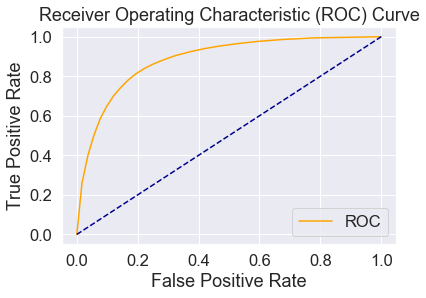

In [163]:
plot_roc_curve(fpr, tpr)

In [149]:
def plot_roc(model, varname):
    y_pp = model.predict_proba(X_test)[:, 1]
    fpr_, tpr_, _ = roc_curve(y_test, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,4))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' ROC', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

In [150]:
plot_roc()

### Can the success of an attack be predict by cross-referencing weather conditions?

    A weather database was downloaded and merged in an attempt to see if there is correlation between weather conditions and terrorist attacks. It contains daily snapshots (taken at 12:00 PM) from January 1979 to July 2017 of the following weather conditions all over the world:

In [147]:
df_w.head(5)

,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,...,target1,gname,summary,2meter_Temp,Total_cloud_cover,vidgf,Surface_pressure,v10,num_victims,has_victims
0,2012,1,1,30.209423,67.018009,0,0,1,1,1,...,Paan Shop,Unknown,01/01/2012: A grenade was thrown into a shop o...,288.217098,9.998669e-13,-366.496179,101457.723797,-3.828428,0.0,0
1,2012,1,1,-0.456120,39.646123,0,0,1,1,1,...,Bar,Al-Shabaab,01/01/2012: Assailants threw two grenades and ...,297.077670,1.530221e-01,606.077234,101103.215653,1.320113,3.0,1
2,2012,1,1,28.636116,69.186465,0,0,1,1,0,...,Soldiers,Baloch Republican Army (BRA),01/01/2012: A convoy of Frontier Corps (FC) so...,282.781350,9.998669e-13,27.355864,99791.450507,-1.696580,4.0,1
3,2012,1,1,-0.456120,39.646123,0,0,1,1,1,...,Bar,Al-Shabaab,01/01/2012: Assailants threw a grenade and ope...,297.077670,1.530221e-01,606.077234,101103.215653,1.320113,NaN,1
4,2012,1,1,28.466667,67.283333,1,0,1,1,1,...,Civilians,Unknown,01/01/2012: Four men were kidnapped from their...,287.513173,9.998669e-13,-17.655798,100755.508624,-3.728933,NaN,1


In [ ]:
df_w.columns

In [ ]:
# Define X and y.
X = df_w[['2meter_Temp', 'Total_cloud_cover', 'vidgf', 'Surface_pressure', 'v10']].fillna(0) # Features
y = df_w['has_victims'].fillna(0) # Target

X.shape, y.shape

In [ ]:
# Count the number of attacks that have at least 1 casualty and those that don't.
y.value_counts()

### SVM model 

In [87]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use SVM as classifier.
model = svm.SVC()

# Fit the model with training sets.
%time model.fit(X_train, y_train)

# Predict wether there are casualties or not.
%time y_pred = model.predict(X_test)

C:\Users\33622\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Wall time: 26min 20s
Wall time: 1min 35s


In [88]:
np.mean(y_pred == y_test)

0.77784178187404

    Support Vector Machine performed best of all classification algorithms tried. To find out, a dummy classifier
    is introduced to predict the most frequent label in the dataset.

### dummy classifier 

In [104]:
# Simply predict the most frequent value every time.
# This determines the baseline accuracy.
model = DummyClassifier(strategy="most_frequent")

%time model.fit(X_train, y_train)

%time y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

Wall time: 4 ms
Wall time: 998 µs


0.5850854454685099

In [ ]:
Support Vector Machine produces an accuracy of 77% versus the dummy classifier of 58%. 
There seems to be some, albeit minimal predictive power in the weather conditions.


### Conclusion 

5. Conclusion
    During the exploratory analysis, it seemed that the location of the attack was of great importance, on the other hand, it was clear that attacks in a region where mostly without a recognizable pattern. The feature analysis points out that when determining the possibility of casualties, the country or region is of less importance. 

    
    5.2. Prediction of casualties
    

    Using a random forest classifier an accuracy of 0.815 is achieved, with a resulting precision of 0.781 recall of 0.784. That means whether there are victims or not the model predicts correctly for both cases equally. 
    cross-validation  showed an accuracy of 0.75 with a 0.04 standard deviation for a 95% confidence interval. 
    

Predictive power weather variables
     Comparing the dummy classifier to SVM, 0.66 and 0.77 respectively, leads to the conclusion that the predictive power of weather dataset is  low to make it a part of  predictive analysis.

    
5.1. Challenges with external databases
A question do environmental factors affect the timing of a terrorist attack? More specifically, do perpetrators consciously or unconsciously take into account weather conditions in some way? Initially, this theory was rejected because there were no indications of a higher chance of an attack in some specific month of the year.

To more formally test the predictive power of weather conditions, an external global weather database was downloaded and terrorism records were appended with the weather conditions of that particular day. Using Support Vector Machine, some predictive power was proven to exist. Although this was minimal, it was still a surprising finding since the nature of the weather database resulted in some inaccuracies while merging. Properties of the weather database that contributed to these inaccuracies were:

Rounded coordinates
The coordinates in the terrorism database were more precise than those of the weather database. Hence the coordinates were rounded to the nearest corresponding coordinate. This could mean a maximum difference of 0.375 degrees, or approximately 55 kilometers latitude and longitude.

Weather timestamp
For the time of day, the problem was the other way around; the weather database timestamps were accurate to three hours at any given day, whereas the terrorism database only covered the date, so no indication of clock time at all. Therefore the weather at 12:00 PM was taken

    These imprecisions would make, the accuracy of the prediction presumably much greater. Concluding, the degree of compatibility of two databases influences / determines the final prediction accuracy.

    
    
    
    
    The major impact of predicting victims wrong leads to the conclusion that this model should not be used. An accuracy of 0.75 where people's lives are at stake is not sufficient, in other words; the cost of being wrong outweighs the benefits of being able to predict 75% correctly.

In [148]:
df['iyear']

0         1970
1         1970
2         1970
3         1970
5         1970
6         1970
8         1970
9         1970
13        1970
15        1970
17        1970
18        1970
19        1970
20        1970
21        1970
22        1970
23        1970
24        1970
25        1970
26        1970
27        1970
28        1970
30        1970
31        1970
32        1970
33        1970
36        1970
37        1970
38        1970
42        1970
          ... 
181650    2017
181652    2017
181653    2017
181654    2017
181656    2017
181657    2017
181658    2017
181659    2017
181661    2017
181663    2017
181664    2017
181665    2017
181666    2017
181669    2017
181670    2017
181671    2017
181672    2017
181673    2017
181675    2017
181676    2017
181677    2017
181678    2017
181681    2017
181682    2017
181683    2017
181684    2017
181685    2017
181688    2017
181689    2017
181690    2017
Name: iyear, Length: 138879, dtype: int64